In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [5]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


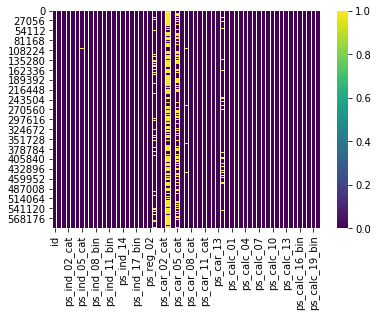

In [6]:
sns.heatmap(train == -1, cmap="viridis")

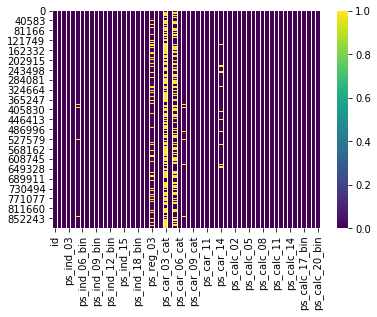

In [7]:
sns.heatmap(test == -1, cmap="viridis")

Replace missing values as -1 with Nan

In [8]:
train[train==-1] = np.NaN
test[test==-1] = np.NaN

obtain feature names with missing values

In [9]:
features_with_missing_values = []
for column in train.columns:
    if train[column].isnull().sum() != 0:
        features_with_missing_values.append(column)

seperate categorical features from non cat features containing missing values

In [10]:
cat_missing_features = []
not_cat_missing_features = []
for column in features_with_missing_values:
    if column.endswith('_cat'):
        cat_missing_features.append(column)
    else:
        not_cat_missing_features.append(column)

In [11]:
train[cat_missing_features].describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat
count,594996.000000,595129.000000,589403.000000,595105.000000,595207.000000,183981.000000,328661.000000,583723.000000,594643.000000
mean,1.359799,0.416992,0.419038,8.297605,0.829947,0.601741,0.525365,0.947621,1.331118
std,0.663193,0.493062,1.350023,2.505396,0.375680,0.489541,0.499357,0.222791,0.976559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.000000,4.000000


seperate bin features from the cat features

In [12]:
cat_and_bin_missing_features = []
all_cat_features = []
for c in cat_missing_features:
    if train[c].min() == 0 and train[c].max()==1:
        cat_and_bin_missing_features.append(c)
    else:
        all_cat_features.append(c)

filling mode with cat and bin

In [13]:
for c in cat_and_bin_missing_features:
    mode_all = pd.concat([train[c],test[c]], axis=0, ignore_index=True)
    mode_value = mode_all.mode().iloc[0]
    train[c].fillna(mode_value, inplace=True)
    test[c].fillna(mode_value, inplace=True)

In [14]:
for c in all_cat_features:
    mode_all = pd.concat([train[c],test[c]], axis=0, ignore_index=True)
    train[c].fillna(mode_all.mode().iloc[0], inplace=True)
    test[c].fillna(mode_all.mode().iloc[0], inplace=True)

filling continuous or ordinal features with mean

In [15]:
for c in not_cat_missing_features:    
    if len(train[c].unique()) <= 10:
        mode_all = pd.concat([train[c], test[c]], axis=0)
        train[c].fillna(mode_all.mode().iloc[0], inplace=True)
        test[c].fillna(mode_all.mode().iloc[0], inplace=True)
    else:
        mean_all = pd.concat([train[c], test[c]], axis=0)
        train[c].fillna(mean_all.mean(), inplace=True)

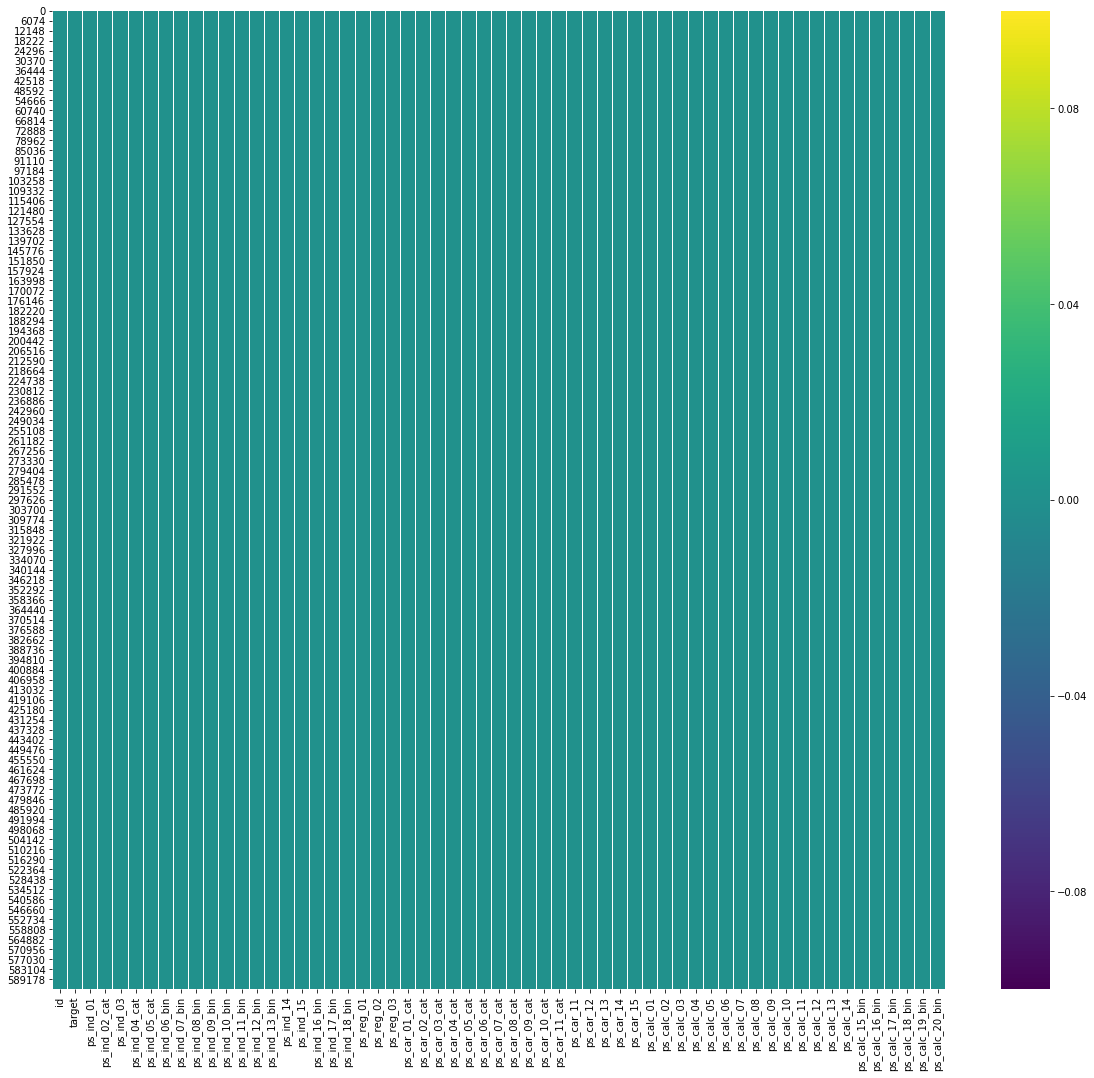

In [16]:
plt.figure(figsize=(20,18))
sns.heatmap(train.isnull(), cmap ='viridis')

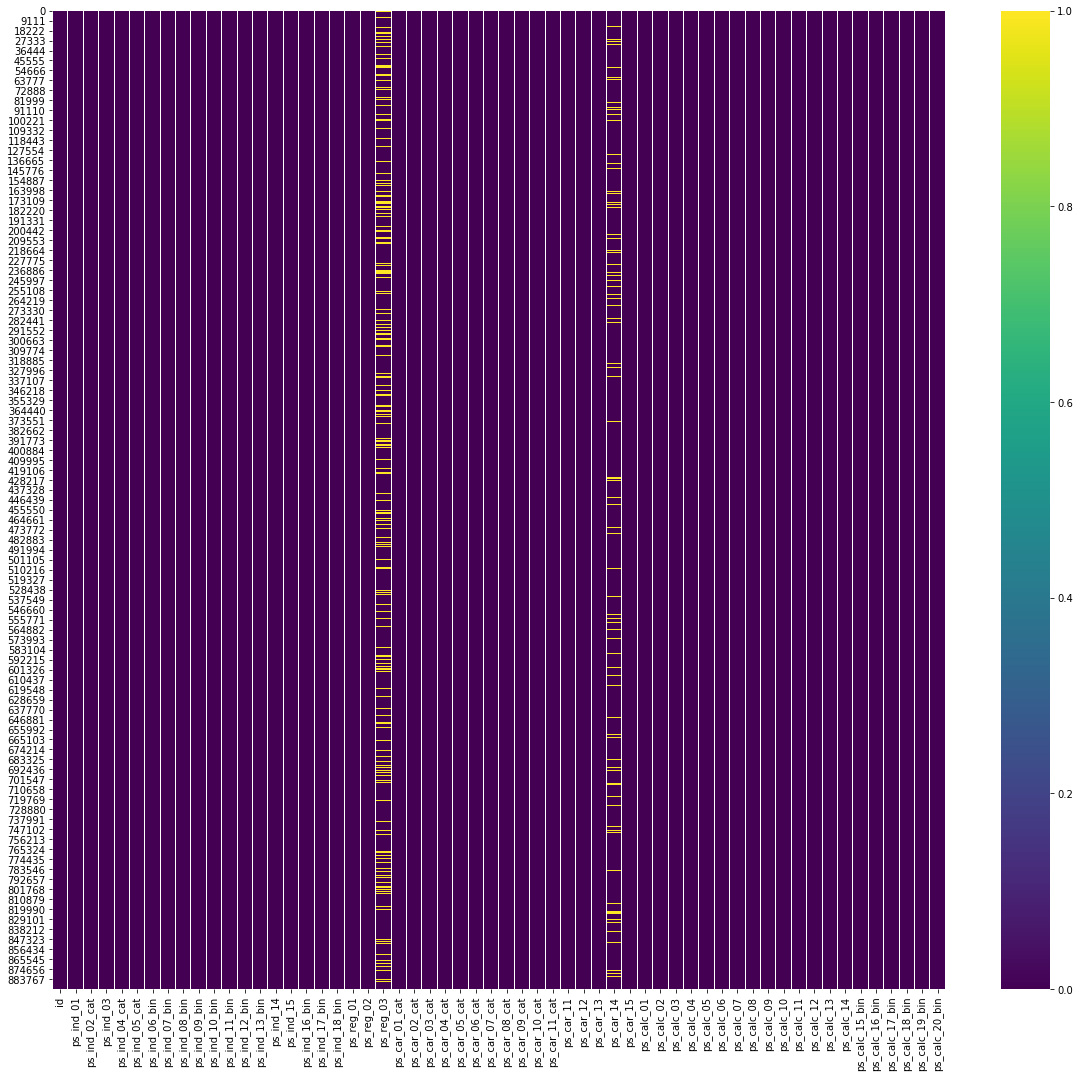

In [17]:
plt.figure(figsize=(20,18))
sns.heatmap(test.isnull(), cmap ='viridis')

In [18]:
test.isnull().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat          0
ps_ind_03              0
ps_ind_04_cat          0
ps_ind_05_cat          0
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat          0
ps_car_02_cat          0
ps_car_03_cat          0
ps_car_04_cat          0
ps_car_05_cat          0
ps_car_06_cat          0
ps_car_07_cat          0
ps_car_08_cat          0
ps_car_09_cat          0
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              0
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


test features with missing values

In [19]:
test_features = ['ps_reg_03','ps_car_14']
for feature in test_features:
    mean_all = pd.concat([train[feature], test[feature]],axis=0)
    test[feature].fillna(mean_all.mean(),inplace=True)

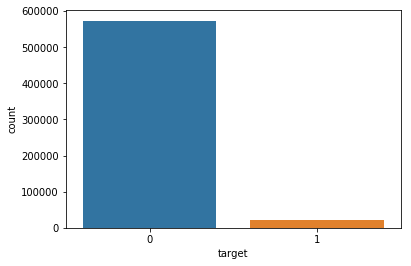

In [20]:
#use balancing to see if accuracy would improve
sns.countplot(x='target', data=train)

In [21]:
train.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

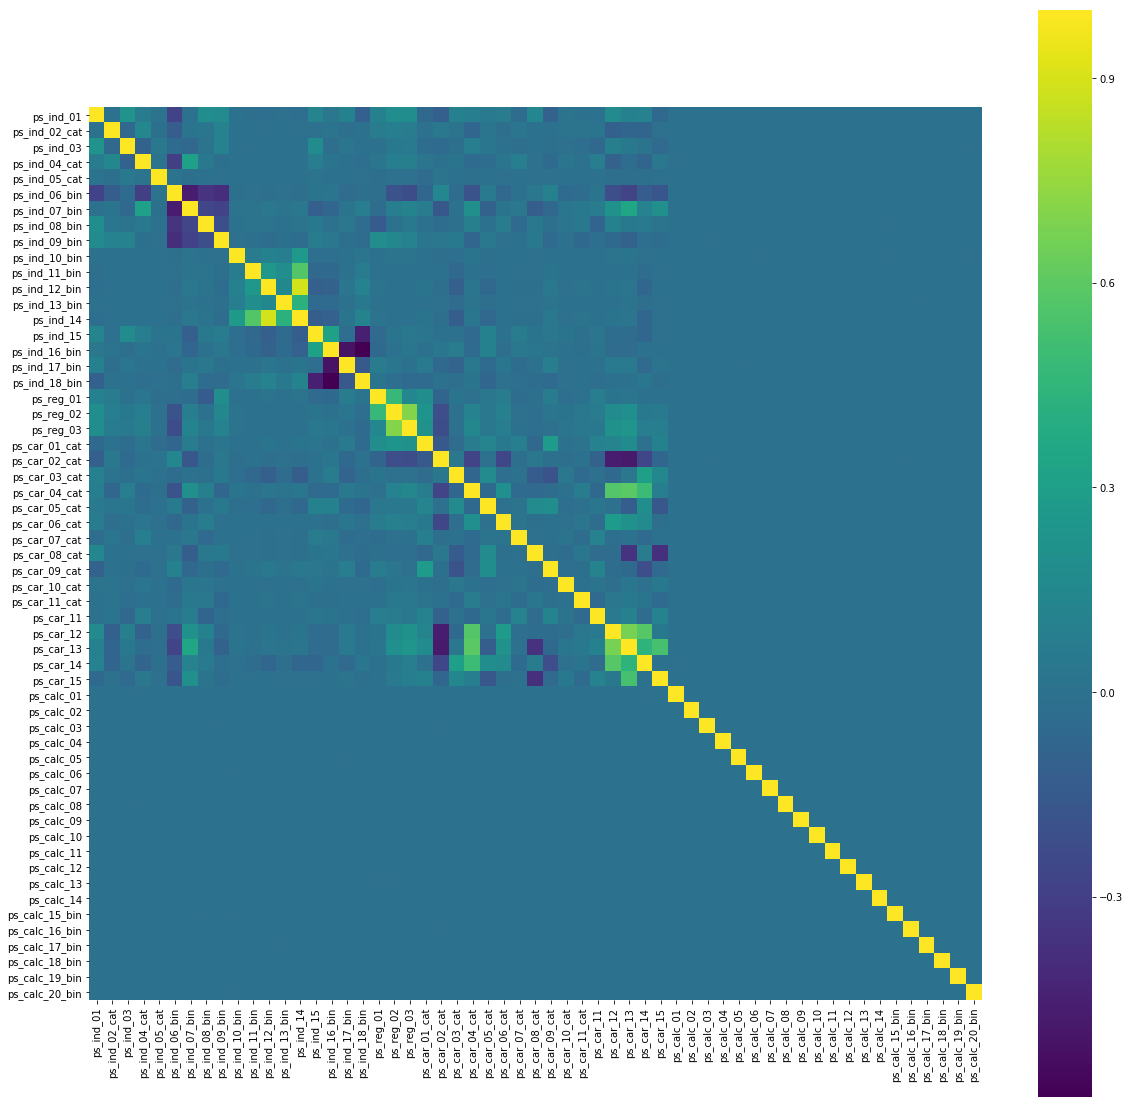

In [22]:
plt.figure(figsize=(20,20))
train_feature = train.drop(['id','target'], axis=1)
sns.heatmap(train_feature.corr(), square=True, cmap="viridis")

using Random forest classifier to rank feature importance

In [23]:
from sklearn.ensemble import RandomForestClassifier

y_train = train.target.values
x_train = (train.drop(['id','target'], axis=1)).values
RCF = RandomForestClassifier()
RCF.fit(x_train, y_train)
selected_features = RCF.feature_importances_

In [25]:
features = (train.drop(['id','target'], axis=1)).columns

In [27]:
feat = dict(zip(features,selected_features))

sort feature importance based on values

In [29]:
from collections import OrderedDict
sorted_feat = OrderedDict(sorted(feat.items(), key=lambda(k,v):(v,k), reverse=True))

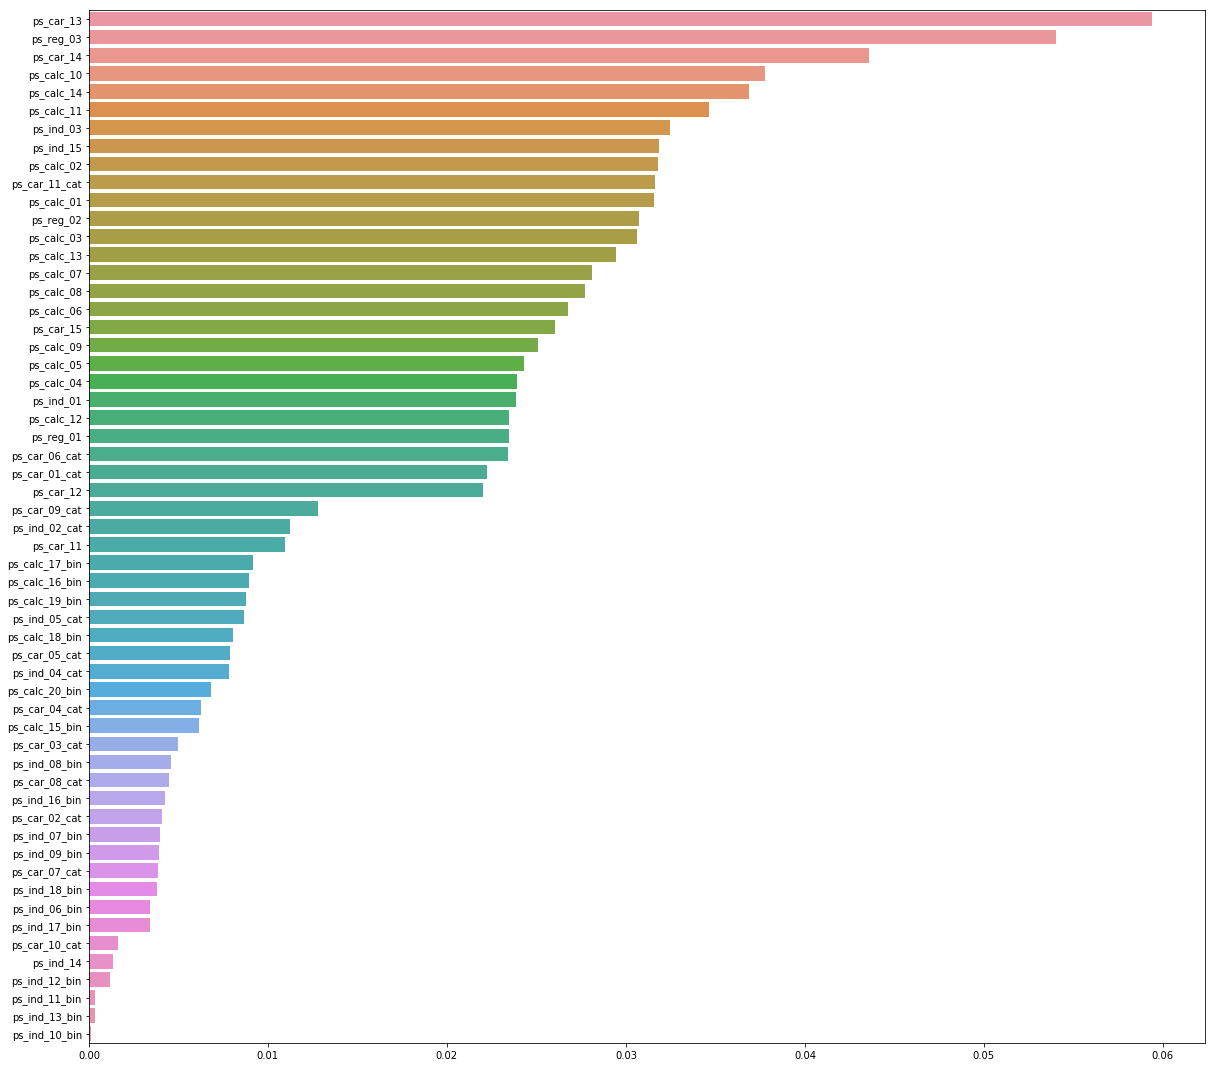

In [30]:
plt.figure(figsize=(20,19))
sns.barplot(y=sorted_feat.keys(),x=sorted_feat.values())

picking the first forty best features

In [31]:
features_selected = []
for i,(feature, feature_values) in enumerate(sorted_feat.items()):
    if i <=40:
        features_selected.append(feature)

In [32]:
#Removing last 6 features
#train_features = train.drop(['id','target','ps_ind_10_bin','ps_ind_13_bin','ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_14','ps_car_10_cat'], axis=1)
#test_features = test.drop(['id','ps_ind_10_bin','ps_ind_13_bin','ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_14','ps_car_10_cat'], axis=1)
train_features = train[features_selected]
test_features = test[features_selected]
#train_features = train.drop(['id','target'], axis=1)
#test_features = test.drop(['id'], axis=1)

Gini score for evaluation purposes

In [33]:
from sklearn.metrics import make_scorer

def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

gini_score = make_scorer(gini_normalized, greater_is_better=True)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

Balancing data (**TODO)

In [34]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler


x_train = train_features.values
y_train = train.target
x_test = test_features.values

In [36]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold

/Users/ahmedaleshinloye/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ahmedaleshinloye/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


training with XGboost

In [51]:
#cv_params= {'max_depth':[3,5,7], 'min_child_weight':[1,3,5] }
#ind_params = {'learning_rate':0.1,'n_estimators':1000,'objective':'binary:logistic', 'subsample':1}
#cv_params = {'learning_rate':[0.001,0.01],'subsample':[0.2,1]}
cv_params = {'num_boost_round':[500,700,1000,2000]}
ind_params = {'max_depth':7, 'min_child_weight':3, 'n_estimators':1000,'objective':'binary:logistic', 'learning_rate':0.01, 'subsample':1}
#ind_params = {'max_depth':7, 'min_child_weight':3, 'n_estimators':1000,'objective':'binary:logistic'}
xgbclf = xgb.XGBClassifier(**ind_params)
gsearch1 = GridSearchCV(xgbclf,cv_params, scoring= gini_score, cv = 5, refit=True, verbose = 2, n_jobs=1)
gsearch1.fit(x_train,y_train)
gsearch1.grid_scores_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] subsample=0.2, learning_rate=0.001 ..............................
[CV] ..................... subsample=0.2, learning_rate=0.001 -16.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.2min remaining:    0.0s


[CV] subsample=0.2, learning_rate=0.001 ..............................
[CV] ..................... subsample=0.2, learning_rate=0.001 -15.0min
[CV] subsample=0.2, learning_rate=0.001 ..............................
[CV] ..................... subsample=0.2, learning_rate=0.001 -14.9min
[CV] subsample=0.2, learning_rate=0.001 ..............................
[CV] ..................... subsample=0.2, learning_rate=0.001 -14.6min
[CV] subsample=0.2, learning_rate=0.001 ..............................
[CV] ..................... subsample=0.2, learning_rate=0.001 -14.3min
[CV] subsample=1, learning_rate=0.001 ................................
[CV] ....................... subsample=1, learning_rate=0.001 -17.6min
[CV] subsample=1, learning_rate=0.001 ................................
[CV] ....................... subsample=1, learning_rate=0.001 -17.7min
[CV] subsample=1, learning_rate=0.001 ................................
[CV] ....................... subsample=1, learning_rate=0.001 -17.3min
[CV] s

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 360.0min finished


[mean: 0.00271, std: 0.00787, params: {'subsample': 0.2, 'learning_rate': 0.001},
 mean: 0.00292, std: 0.00785, params: {'subsample': 1, 'learning_rate': 0.001},
 mean: 0.00271, std: 0.00787, params: {'subsample': 0.2, 'learning_rate': 0.01},
 mean: 0.00298, std: 0.00786, params: {'subsample': 1, 'learning_rate': 0.01}]

using xgboost cv

In [40]:
best_params = {'learning_rate':0.01, 'subsample':0.8,'max_depth':7, 'min_child_weight':3, 'n_estimators':1000,'objective':'binary:logistic','colsample_bytree': 0.4,'max_delta_step': 1.8}
xgb_train = xgb.DMatrix(x_train,y_train)
cvxgb= xgb.cv(best_params,xgb_train, num_boost_round=1000, nfold= 5, early_stopping_rounds= 100, verbose_eval= 2, seed=2, feval=gini_xgb)

[0]	train-gini:0.0399124+0.00550761	test-gini:0.0397252+0.0101057
[2]	train-gini:0.116051+0.0213843	test-gini:0.112846+0.0244309
[4]	train-gini:0.190176+0.00496564	test-gini:0.179978+0.00815163
[6]	train-gini:0.216832+0.00672576	test-gini:0.205207+0.00412442
[8]	train-gini:0.231229+0.00752351	test-gini:0.215267+0.00857638
[10]	train-gini:0.236892+0.00515113	test-gini:0.220183+0.0081861
[12]	train-gini:0.241601+0.00407759	test-gini:0.223605+0.00917597
[14]	train-gini:0.244531+0.00418133	test-gini:0.226363+0.0097912
[16]	train-gini:0.246382+0.0044646	test-gini:0.226817+0.00834429
[18]	train-gini:0.248952+0.00414704	test-gini:0.228367+0.00803749
[20]	train-gini:0.250642+0.00391415	test-gini:0.229182+0.00861136
[22]	train-gini:0.253129+0.00358715	test-gini:0.230655+0.0092949
[24]	train-gini:0.254739+0.00392476	test-gini:0.231108+0.00936524
[26]	train-gini:0.256813+0.00459476	test-gini:0.231959+0.00787202
[28]	train-gini:0.25825+0.00455294	test-gini:0.232303+0.00822391
[30]	train-gini:0.259

In [71]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [36]:

best_params = {'learning_rate':0.01,'subsample':0.8,'max_depth':7, 'min_child_weight':1, 'n_estimators':1000,'objective':'binary:logistic','colsample_bytree': 0.4,'max_delta_step': 1.8, 'gamma':0.65}
skf = StratifiedKFold(n_splits=5)
y_pred = 0
gini_score = 0
for train_index, test_index in skf.split(x_train,y_train):
    Xtrain, Xtest = x_train[train_index], x_train[test_index]
    Ytrain, Ytest = y_train[train_index], y_train[test_index]
    xgbtrain = xgb.DMatrix(Xtrain,Ytrain)
    xgbvalid = xgb.DMatrix(Xtest,Ytest)
    xgbtest = xgb.DMatrix(x_test)
    watchlist = [(xgbtrain,'train'),(xgbvalid,'valid')]
    mdl = xgb.train(best_params, xgbtrain, num_boost_round=1100, evals=watchlist, feval=gini_xgb,  maximize=True, early_stopping_rounds= 100,verbose_eval=2)
    gini_score+=(gini_normalized(Ytest, mdl.predict(xgbvalid)))/5
    
    y_pred += mdl.predict(xgbtest)/5
print 'valid_gini_score ' +str(gini_score)

[0]	train-gini:0.039114	valid-gini:0.043723
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 100 rounds.
[2]	train-gini:0.128484	valid-gini:0.119133
[4]	train-gini:0.19336	valid-gini:0.190493
[6]	train-gini:0.239075	valid-gini:0.226767
[8]	train-gini:0.254334	valid-gini:0.237925
[10]	train-gini:0.257656	valid-gini:0.238356
[12]	train-gini:0.262721	valid-gini:0.244467
[14]	train-gini:0.265399	valid-gini:0.246528
[16]	train-gini:0.265798	valid-gini:0.245923
[18]	train-gini:0.268398	valid-gini:0.248663
[20]	train-gini:0.272615	valid-gini:0.252394
[22]	train-gini:0.272293	valid-gini:0.251809
[24]	train-gini:0.274848	valid-gini:0.254507
[26]	train-gini:0.276772	valid-gini:0.25483
[28]	train-gini:0.27703	valid-gini:0.253467
[30]	train-gini:0.277644	valid-gini:0.252382
[32]	train-gini:0.279803	valid-gini:0.253554
[34]	train-gini:0.281487	valid-gini:0.253789
[36]	train-gini:0.281343	valid-gini:0.252928
[38]	tr

In [63]:
best_params = {'learning_rate':0.01,'subsample':0.8,'max_depth':7, 'min_child_weight':1, 'n_estimators':1000,'objective':'binary:logistic','colsample_bytree': 0.4,'max_delta_step': 1.8, 'gamma':0.65}
skf = StratifiedKFold(n_splits=5, shuffle=True)
y_pred = 0
gini_score = 0
for train_index, test_index in skf.split(x_train,y_train):
    Xtrain, Xtest = x_train[train_index], x_train[test_index]
    Ytrain, Ytest = y_train[train_index], y_train[test_index]
    xgbtrain = xgb.DMatrix(Xtrain,Ytrain)
    xgbvalid = xgb.DMatrix(Xtest,Ytest)
    xgbtest = xgb.DMatrix(x_test)
    watchlist = [(xgbtrain,'train'),(xgbvalid,'valid')]
    mdl = xgb.train(best_params, xgbtrain, num_boost_round=1100, evals=watchlist, feval=gini_xgb,  maximize=True, early_stopping_rounds= 100,verbose_eval=2)
    gini_score+=(gini_normalized(Ytest, mdl.predict(xgbvalid)))/5
    
    y_pred += mdl.predict(xgbtest)/5
print 'valid_gini_score ' +str(gini_score)

[0]	train-gini:0.031245	valid-gini:0.0294
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 100 rounds.
[2]	train-gini:0.131782	valid-gini:0.115936
[4]	train-gini:0.210933	valid-gini:0.191231
[6]	train-gini:0.248816	valid-gini:0.226297
[8]	train-gini:0.260144	valid-gini:0.237975
[10]	train-gini:0.261306	valid-gini:0.236455
[12]	train-gini:0.263479	valid-gini:0.238627
[14]	train-gini:0.266249	valid-gini:0.242381
[16]	train-gini:0.265478	valid-gini:0.24104
[18]	train-gini:0.269255	valid-gini:0.240489
[20]	train-gini:0.270536	valid-gini:0.239744
[22]	train-gini:0.270561	valid-gini:0.239306
[24]	train-gini:0.273031	valid-gini:0.240025
[26]	train-gini:0.274056	valid-gini:0.240092
[28]	train-gini:0.275867	valid-gini:0.241829
[30]	train-gini:0.276224	valid-gini:0.242037
[32]	train-gini:0.277736	valid-gini:0.241785
[34]	train-gini:0.278992	valid-gini:0.242468
[36]	train-gini:0.280696	valid-gini:0.243323
[38]	tr

Selecting boosting round of 1100

In [66]:
best_params = {'learning_rate':0.01, 'subsample':0.8,'max_depth':7, 'min_child_weight':1, 'n_estimators':1000,'objective':'binary:logistic','colsample_bytree': 0.4,'max_delta_step': 1.8}
xgb_train = xgb.DMatrix(x_train,y_train)
watchlist = [(xgb_train,'train')]
trainxgb = xgb.train(best_params,xgb_train,evals=watchlist,num_boost_round=1100,feval=gini_xgb, maximize=True, verbose_eval=2)
xgb_test = xgb.DMatrix(x_test)
y_pred = trainxgb.predict(xgb_test)
submission= pd.DataFrame({"target":y_pred}, index=test['id'].values)
submission.index.name ='id'
submission.to_csv('sub.csv')

[0]	train-gini:0.018561
[2]	train-gini:0.150585
[4]	train-gini:0.21256
[6]	train-gini:0.236107
[8]	train-gini:0.250905
[10]	train-gini:0.248549
[12]	train-gini:0.256504
[14]	train-gini:0.26102
[16]	train-gini:0.267625
[18]	train-gini:0.271514
[20]	train-gini:0.272938
[22]	train-gini:0.273782
[24]	train-gini:0.274986
[26]	train-gini:0.276464
[28]	train-gini:0.277959
[30]	train-gini:0.278451
[32]	train-gini:0.279362
[34]	train-gini:0.280596
[36]	train-gini:0.281936
[38]	train-gini:0.28197
[40]	train-gini:0.284586
[42]	train-gini:0.286345
[44]	train-gini:0.286816
[46]	train-gini:0.286935
[48]	train-gini:0.287073
[50]	train-gini:0.287741
[52]	train-gini:0.28918
[54]	train-gini:0.289651
[56]	train-gini:0.290605
[58]	train-gini:0.291519
[60]	train-gini:0.292309
[62]	train-gini:0.292649
[64]	train-gini:0.293868
[66]	train-gini:0.295107
[68]	train-gini:0.295712
[70]	train-gini:0.296892
[72]	train-gini:0.297457
[74]	train-gini:0.297684
[76]	train-gini:0.298494
[78]	train-gini:0.29889
[80]	train

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cat_col_index = []

for i,col in enumerate(X.columns):
    if X[col].dtypes == np.int64:
        cat_col_index.append(i)

params = {'depth':[1,2,3,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

cat_params = {'cat_features':cat_col_index}
cb = CatBoostClassifier(**cat_params)

randsearch1 = (cb, params, n_iter=10, scoring = gini_score, cv = 5, refit=True, verbose= 2, random_state=0 )
randfit= randsearch1.fit(x_train,y_train, **cat_params)
rendfit.cv_results_

In [52]:
x_train.shape

(595212, 41)

In [53]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def create_model():
    # create your model using this function
    model = Sequential()
    model.add(Dense(30, input_dim = 41, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer = optimizer)
    return model
dnn = KerasClassifier(build_fn=create_model, epochs=60, batch_size=32, verbose=2)

In [ ]:
model.fit(np.array(X), np.array(y))
pred_prob = model.predict_proba(np.array(test.drop(['id'], axis=1)))
submission = pd.DataFrame({'id':test['id'],'target':pred_prob[:,1]})
submission = submission.set_index('id')
submission.to_csv('subcv.csv')

Stacking xgboost and dnn

In [54]:
best_params = {'learning_rate':0.01, 'subsample':0.8,'max_depth':7, 'min_child_weight':1, 'n_estimators':1000,'objective':'binary:logistic','colsample_bytree': 0.4,'max_delta_step': 1.8}
xgbclf = xgb.XGBClassifier(**best_params)

clfs = [xgbclf, dnn]

skf2 = StratifiedKFold(n_splits=5, shuffle=True)
bag_pred_test = np.zeros((x_test.shape[0],2))
lr_pred_train = np.zeros((x_train.shape[0],2))
for i,clf in enumerate(clfs):
    print i
    bag_pred_test_j = np.zeros((x_test.shape[0],5))
    cv_prediction = []
    for j,(train_index,test_index) in enumerate(skf2.split(x_train, y_train)):
        trainx, testx = x_train[train_index], x_train[test_index]
        trainy, testy = y_train[train_index], y_train[test_index]
        clf.fit(trainx,trainy)
        pred = gini_normalized(testy,clf.predict(testx))
        cv_prediction.append(pred)
        lr_pred_train[test_index,i] = clf.predict_proba(testx)[:,1]
        bag_pred_test_j[:,j] = clf.predict_proba(x_test)[:,1]
    print 'cv accuracy: ' +str(pred) +' ' +str(i)
    bag_pred_test[:,i] = np.mean(bag_pred_test_j, axis=1)



0
cv accuracy: 0.00570601469209 0
1
Epoch 1/60
41s - loss: 0.1643
Epoch 2/60
37s - loss: 0.1588
Epoch 3/60
36s - loss: 0.1581
Epoch 4/60
37s - loss: 0.1578
Epoch 5/60
38s - loss: 0.1574
Epoch 6/60
41s - loss: 0.1573
Epoch 7/60
38s - loss: 0.1571
Epoch 8/60
43s - loss: 0.1570
Epoch 9/60
39s - loss: 0.1570
Epoch 10/60
38s - loss: 0.1569
Epoch 11/60
38s - loss: 0.1568
Epoch 12/60
38s - loss: 0.1567
Epoch 13/60
38s - loss: 0.1566
Epoch 14/60
39s - loss: 0.1566
Epoch 15/60
38s - loss: 0.1565
Epoch 16/60
38s - loss: 0.1565
Epoch 17/60
37s - loss: 0.1564
Epoch 18/60
37s - loss: 0.1564
Epoch 19/60
41s - loss: 0.1564
Epoch 20/60
38s - loss: 0.1563
Epoch 21/60
37s - loss: 0.1563
Epoch 22/60
36s - loss: 0.1563
Epoch 23/60
37s - loss: 0.1562
Epoch 24/60
38s - loss: 0.1562
Epoch 25/60
37s - loss: 0.1562
Epoch 26/60
37s - loss: 0.1561
Epoch 27/60
36s - loss: 0.1561
Epoch 28/60
39s - loss: 0.1561
Epoch 29/60
38s - loss: 0.1560
Epoch 30/60
37s - loss: 0.1560
Epoch 31/60
40s - loss: 0.1560
Epoch 32/60


NameError: name 'LogisticRegression' is not defined

In [58]:
from sklearn.decomposition import PCA

pca= PCA(n_components=10)
pca.fit(x_train)
y_pca = pca.transform(x_train)


In [65]:
pca.fit(x_test)
y_pca_test = pca.transform(x_test)

In [62]:
lr_train = np.concatenate((lr_pred_train,y_pca), axis=1)

In [67]:
lr_test = np.concatenate((bag_pred_test, y_pca_test), axis=1)

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
print cross_val_score(lr, lr_train, y_train, cv=5, scoring=gini_score, verbose=2)
#getting output by bagging prediction
#y_pred_bagging = np.mean(bag_pred_test, axis=1)

[CV]  ................................................................
[CV] ................................................. , total=   6.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] ................................................. , total=   4.2s
[CV]  ................................................................
[CV] ................................................. , total=   4.3s
[CV]  ................................................................
[CV] ................................................. , total=   4.2s
[CV]  ................................................................
[CV] ................................................. , total=   5.1s
[ 0.00970674  0.01545658 -0.00259138 -0.00170531 -0.00415777]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.4s finished


In [94]:
import lightgbm as lgb

lgb_train = lgb.Dataset(lr_train, y_train)
lgb_test = lgb.Dataset(lr_test)
params ={'max_depth':5,'min_child_samples':128,'learning_rate':0.01,'objective':'binary', 'num_leaves':32, 'max_bin':128, 'num_iterations':1000,'verbose':2}
res = lgb.train(params, lgb_train, 1000,verbose_eval=100)

In [97]:
y_pred = res.predict(lr_test)

In [98]:
submission = pd.DataFrame({'id':test['id'],'target':y_pred})
submission = submission.set_index('id')
submission.to_csv('sublgbm.csv')

In [74]:
lr.fit(lr_train,y_train)
y_pred_lr = lr.predict_proba(lr_test)
submission = pd.DataFrame({'id':test['id'],'target':y_pred_lr[:,1]})
submission = submission.set_index('id')
submission.to_csv('substack.csv')